<a href="https://colab.research.google.com/github/vuhai3903/VuDucHai-20213903/blob/main/Code_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Upload dataset lên colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Các thư viện**

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# **Bộ dữ liệu CTU-13 từ Drive**

In [ ]:
folder_path = '/content/drive/MyDrive/my_dataset/dataset'
df3 = pd.read_csv(os.path.join(folder_path, 'capture20110815-2.csv'))
df4 = pd.read_csv(os.path.join(folder_path, 'capture20110815-3.csv'))
df5 = pd.read_csv(os.path.join(folder_path, 'capture20110815.csv'))
df10 = pd.read_csv(os.path.join(folder_path, 'capture20110818-2.csv'))
df12 = pd.read_csv(os.path.join(folder_path, 'capture20110818.csv'))
df = pd.concat([df3, df4, df5, df10, df12], ignore_index=True)
df

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/15 16:43:28.078942,0.000000,tcp,114.33.245.44,6881,?>,147.32.84.118,1567,RA_,0.0,0.0,1,60,60,flow=Background
1,2011/08/15 16:43:32.283576,13.431962,tcp,212.93.105.52,49237,->,147.32.84.229,80,SRA_SA,0.0,0.0,6,388,208,flow=Background-TCP-Established
2,2011/08/15 16:43:32.456441,13.350228,tcp,212.93.105.52,14906,->,147.32.84.229,13363,SRA_SA,0.0,0.0,6,388,208,flow=Background-TCP-Established
3,2011/08/15 16:43:32.850648,13.010090,tcp,212.93.105.52,60349,->,147.32.84.229,443,SRA_SA,0.0,0.0,6,388,208,flow=Background-TCP-Established
4,2011/08/15 16:45:09.305002,20.990047,tcp,115.127.24.116,3198,->,147.32.84.229,443,SR_SA,0.0,0.0,5,308,122,flow=Background-TCP-Established
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593094,2011/08/18 15:04:59.579762,0.000158,tcp,219.129.213.146,25463,->,147.32.87.44,80,S_SA,0.0,0.0,2,152,78,flow=Background-TCP-Established
4593095,2011/08/18 15:04:59.626719,0.000688,udp,213.220.104.152,64126,<->,147.32.84.229,13363,CON,0.0,0.0,2,306,244,flow=Background-UDP-Established
4593096,2011/08/18 15:04:59.686325,0.000689,udp,59.22.11.248,44432,<->,147.32.84.229,13363,CON,0.0,0.0,2,144,83,flow=Background-UDP-Established
4593097,2011/08/18 15:04:59.690632,0.000000,udp,95.102.170.66,16978,->,147.32.84.229,13363,INT,0.0,NaN,1,172,172,flow=Background-UDP-Attempt


# **1.Tiền xử lí bộ dữ liệu**



## **1.1.Xử lí giá trị nhãn**

In [ ]:
lst = []
for i in df['Label']:
    if 'Botnet' in i:
        lst.append(1)
    elif 'Normal' in i:
        lst.append(2)
    else:
        lst.append(0)

df['Label'] = lst
df['Label'].value_counts()

,count
Label,
0,4354648
1,158000
2,80451


##**1.2.Xoá các cột ‘StartTime’, ‘SrcAddr’, ‘Sport’, ‘DstAddr’, ‘Dport’, ‘State’**

In [ ]:
df = df.drop(['StartTime','SrcAddr','Sport','DstAddr','Dport','State'], axis=1)
df

,Dur,Proto,Dir,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,0.000000,tcp,?>,0.0,0.0,1,60,60,0
1,13.431962,tcp,->,0.0,0.0,6,388,208,0
2,13.350228,tcp,->,0.0,0.0,6,388,208,0
3,13.010090,tcp,->,0.0,0.0,6,388,208,0
4,20.990047,tcp,->,0.0,0.0,5,308,122,0
...,...,...,...,...,...,...,...,...,...
4593094,0.000158,tcp,->,0.0,0.0,2,152,78,0
4593095,0.000688,udp,<->,0.0,0.0,2,306,244,0
4593096,0.000689,udp,<->,0.0,0.0,2,144,83,0
4593097,0.000000,udp,->,0.0,NaN,1,172,172,0


Số lượng các giá trị bị thiếu trong các cột

In [ ]:
df.isnull().sum()

,0
Dur,0
Proto,0
Dir,0
sTos,49849
dTos,414028
TotPkts,0
TotBytes,0
SrcBytes,0
Label,0


## **1.3.Xử lý các giá trị bị thiếu (NaN)**

In [ ]:
df = df.fillna(10)

df.isnull().sum()

,0
Dur,0
Proto,0
Dir,0
sTos,0
dTos,0
TotPkts,0
TotBytes,0
SrcBytes,0
Label,0


In [ ]:
df_1_4_1 = df.copy()
df_1_4_2 = df.copy()

## **1.4.Xử lý dữ liệu có giá trị là biến phân loại**

### 1.4.1.Mã hoá giá trị số  

In [ ]:
def encode_dir_proto(df):
    dir_map = {'<->': 1, '->': 2}
    proto_map = {'udp': 20, 'tcp': 30, 'icmp': 40}

    df['Dir'] = df['Dir'].str.strip()
    df['Dir'] = df['Dir'].map(dir_map).fillna(0)

    df['Proto'] = df['Proto'].str.strip()
    df['Proto'] = df['Proto'].map(proto_map).fillna(0)

    return df
df_1_1_1 = encode_dir_proto(df_1_4_1)
df_1_4_1['Dir'].value_counts()

,count
Dir,
1.0,3212631
2.0,1306825
0.0,73643


In [ ]:
df_1_4_1['Proto'].value_counts()

,count
Proto,
20.0,3333333
30.0,1030671
40.0,212957
0.0,16138


### 1.4.2.Mã hoá One-Hot Encoding

In [ ]:
def OneHot_Ending(df):

        dir_values = ['<->', '->']
        proto_values = ['tcp', 'udp', 'icmp']
        tos_values = ['0.0', '10.0']

        df['Dir'] = df['Dir'].str.strip().apply(lambda x: x if x in dir_values else 'others')
        df['Proto'] = df['Proto'].str.lower().apply(lambda x: x if x in proto_values else 'others')
        df['sTos'] = df['sTos'].apply(lambda x: x if x in tos_values else 'others')
        df['dTos'] = df['dTos'].apply(lambda x: x if x in tos_values else 'others')

        df_encoded = pd.get_dummies(df, columns=['Dir', 'Proto', 'sTos', 'dTos'])

        return df_encoded

df_1_4_2 = OneHot_Ending(df_1_4_2)
df_1_4_2

,Dur,TotPkts,TotBytes,SrcBytes,Label,Dir_->,Dir_<->,Dir_others,Proto_icmp,Proto_others,Proto_tcp,Proto_udp,sTos_0.0,sTos_10.0,sTos_others,dTos_0.0,dTos_10.0,dTos_others
0,0.000000,1,60,60,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,13.431962,6,388,208,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,13.350228,6,388,208,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,13.010090,6,388,208,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,20.990047,5,308,122,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593094,0.000158,2,152,78,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4593095,0.000688,2,306,244,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4593096,0.000689,2,144,83,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4593097,0.000000,1,172,172,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x_1_4_1 = df_1_4_1.drop('Label', axis=1) # Trường hợp mã hóa gán trị số
x_1_4_2 = df_1_4_2.drop('Label', axis=1) # Trường hợp mã hóa One Hot Encoding sẽ tiếp tục dùng phương pháp Feature Selection


In [ ]:
y = df['Label']

## **1.5.Kỹ thuật Feature Selection**

### **1.5.1.ANOVA**

In [ ]:
def anova(x_1_4_2, y):

  selector = SelectKBest(score_func=f_classif,k=10)  # k là cọt đặc trưng muốn giữ
  x_ANOVA = selector.fit_transform(x_1_4_2, y)
  return x_ANOVA , selector

x_ANOVA, selector = anova(x_1_4_2, y)
selected_cols_ANOVA = x_1_4_2.columns[selector.get_support()]
selected_cols_ANOVA

Index(['Dur', 'Dir_->', 'Dir_<->', 'Dir_others', 'Proto_icmp', 'Proto_tcp',
       'Proto_udp', 'sTos_0.0', 'dTos_0.0', 'dTos_10.0'],
      dtype='object')

Với ANOVA thì ta có các cột 'Dur', 'Dir_->', 'Dir_<->', 'Dir_others','Proto_icmp', 'Proto_others',
       'Proto_tcp', 'Proto_udp', 'sTos_0.0', 'sTos_others', 'dTos_0.0',
       'dTos_10.0'

### **1.5.2.Chi-Squared**

In [ ]:
def chi_squared(x_1_4_2, y):

    selector = SelectKBest(chi2, k=10) # k là cọt đặc trưng muốn giữ
    x_chi_2 = selector.fit_transform(x_1_4_2, y)
    selected_cols_chi_2 = x_1_4_2.columns[selector.get_support()]

    return x_chi_2, selected_cols_chi_2

x_chi_2, selected_cols_chi_2 = chi_squared(x_1_4_2, y)

selected_cols_chi_2

Index(['Dur', 'TotPkts', 'TotBytes', 'SrcBytes', 'Dir_->', 'Dir_<->',
       'Proto_icmp', 'Proto_udp', 'dTos_0.0', 'dTos_10.0'],
      dtype='object')

Với Chi-Squared có cột là  'Dur', 'TotPkts', 'TotBytes', 'SrcBytes', 'Dir_->', 'Dir_<->',
       'Proto_icmp', 'Proto_udp', 'dTos_0.0', 'dTos_10.0'

**Vậy 2 phương pháp trên có sự khác nhau về chọn côt**

## **1.6.Xử lý tập dữ liệu mất cân bằng**





### **1.6.1.RandomUnderSampler**

In [ ]:
def randomundersampler(x, y):

    rus = RandomUnderSampler(random_state=0, sampling_strategy={0: 240000, 1: 158000, 2: 80451})  # số mẫu nhãn 0 = nhãn 1 + nhãn 2
    x_UnderSampler, y_UnderSampler = rus.fit_resample(x, y)

    return x_UnderSampler, y_UnderSampler

x_UnderSampler_1_4_1, y_UnderSampler_1_4_1 = randomundersampler(x_1_4_1, y)  # TH mã hóa gán trị số xử lí mất căn bằng RandomUnderSampler
y_UnderSampler_1_4_1.value_counts()


,count
Label,
0,240000
1,158000
2,80451


In [ ]:
x_UnderSampler_ANOVA, y_UnderSampler_ANOVA = randomundersampler(x_ANOVA, y)  # TH ANOVA xử lí mất căn bằng RandomUnderSampler
y_UnderSampler_ANOVA.value_counts()


,count
Label,
0,240000
1,158000
2,80451


In [ ]:
x_UnderSampler_chi_2, y_UnderSampler_chi_2 = randomundersampler(x_chi_2, y)  # TH chi 2 xử lí mất căn bằng RandomUnderSampler
y_UnderSampler_chi_2.value_counts()

,count
Label,
0,240000
1,158000
2,80451


### **1.6.2.NearMiss**

In [ ]:
def nearmiss(x, y):
    nm = NearMiss(version=1, sampling_strategy={0: 240000, 1: 158000, 2: 80451}) # tổng 0 = 1 +2
    x_nearmiss, y_nearmiss = nm.fit_resample(x, y)

    return x_nearmiss,y_nearmiss
x_nearmiss_ANOVA, y_nearmiss_ANOVA = nearmiss(x_ANOVA,y)
y_nearmiss_ANOVA.value_counts()   # TH ANOVA xử lí mất căn bằng nearmiss


,count
Label,
0,240000
1,158000
2,80451


In [ ]:
x_nearmiss_1_4_1, y_nearmiss_1_4_1 = nearmiss(x_1_4_1,y)
y_nearmiss_1_4_1.value_counts()   # TH mã hóa gán trị số xử lí mất căn bằng nearmiss

,count
Label,
0,240000
1,158000
2,80451


In [ ]:
x_nearmiss_chi_2, y_nearmiss_chi_2 = nearmiss(x_chi_2,y)
y_nearmiss_chi_2.value_counts()   # TH chi 2 xử lí mất căn bằng nearmiss

,count
Label,
0,240000
1,158000
2,80451


In [ ]:
x_train_UnderSampler_1_4_1, x_test_UnderSampler_1_4_1, y_train_UnderSampler_1_4_1, y_test_UnderSampler_1_4_1 = train_test_split(x_UnderSampler_1_4_1, y_UnderSampler_1_4_1, test_size=0.2, random_state=42, stratify=y_UnderSampler_1_4_1)
x_train_UnderSampler_ANOVA, x_test_UnderSampler_ANOVA, y_train_UnderSampler_ANOVA, y_test_UnderSampler_ANOVA = train_test_split(x_UnderSampler_ANOVA, y_UnderSampler_ANOVA, test_size=0.2, random_state=42,stratify=y_UnderSampler_ANOVA)
x_train_UnderSampler_chi_2, x_test_UnderSampler_chi_2, y_train_UnderSampler_chi_2, y_test_UnderSampler_chi_2 = train_test_split(x_UnderSampler_chi_2, y_UnderSampler_chi_2, test_size=0.2, random_state=42, stratify=y_UnderSampler_chi_2)

x_train_nearmiss_1_4_1, x_test_nearmiss_1_4_1, y_train_nearmiss_1_4_1, y_test_nearmiss_1_4_1 = train_test_split(x_nearmiss_1_4_1, y_nearmiss_1_4_1, test_size=0.2, random_state=42, stratify=y_nearmiss_1_4_1)
x_train_nearmiss_ANOVA, x_test_nearmiss_ANOVA, y_train_nearmiss_ANOVA, y_test_nearmiss_ANOVA = train_test_split(x_nearmiss_ANOVA, y_nearmiss_ANOVA, test_size=0.2, random_state=42, stratify=y_nearmiss_ANOVA)
x_train_nearmiss_chi_2, x_test_nearmiss_chi_2, y_train_nearmiss_chi_2, y_test_nearmiss_chi_2 = train_test_split(x_nearmiss_chi_2, y_nearmiss_chi_2, test_size=0.2, random_state=42, stratify=y_nearmiss_chi_2)


## **1.7.Chuẩn hóa dữ liệu**

### **1.7.1.Normalization**

In [ ]:
def Normalization(x_train ,x_test):

    scaler = MinMaxScaler(feature_range=(0,1)).fit(x_train)

    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train ,x_test
x_train_1_4_1_UnderSampler_Normalization , x_test_1_4_1_UnderSampler_Normalization = Normalization (x_train_UnderSampler_1_4_1, x_test_UnderSampler_1_4_1)
x_train_1_4_1_UnderSampler_Normalization[:5] # TH dùng mã số 1.4.1 + UnderSampler

array([[2.25138513e-02, 3.52941176e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.71362268e-05, 1.51930893e-05, 5.50171452e-05],
       [6.20716971e-08, 1.00000000e+00, 5.00000000e-01, 0.00000000e+00,
        0.00000000e+00, 9.69150956e-07, 1.54601279e-07, 5.83831883e-07],
       [8.31516885e-01, 1.00000000e+00, 5.00000000e-01, 0.00000000e+00,
        0.00000000e+00, 1.06606605e-05, 1.46871215e-06, 7.78442511e-06],
       [1.18912417e-01, 3.52941176e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.10128306e-05, 7.74913813e-06, 3.90014114e-05],
       [3.57959274e-04, 3.52941176e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.84575478e-06, 3.07194749e-07, 1.34065099e-06]])

In [ ]:
x_train_1_4_1_nearmiss_Normalization , x_test_1_4_1_nearmiss_Normalization = Normalization(x_train_nearmiss_1_4_1, x_test_nearmiss_1_4_1)
x_train_1_4_1_nearmiss_Normalization[:5] # TH mã hóa số 1.4.1 + mearmiss

array([[6.94444492e-08, 1.00000000e+00, 5.00000000e-01, 0.00000000e+00,
        0.00000000e+00, 4.23994709e-06, 5.61648463e-07, 5.98247485e-07],
       [5.16666702e-08, 1.00000000e+00, 5.00000000e-01, 0.00000000e+00,
        0.00000000e+00, 4.23994709e-06, 5.32845978e-07, 5.69416281e-07],
       [6.22222264e-08, 1.00000000e+00, 5.00000000e-01, 0.00000000e+00,
        0.00000000e+00, 4.23994709e-06, 5.32845978e-07, 5.69416281e-07],
       [6.41666710e-08, 1.00000000e+00, 5.00000000e-01, 0.00000000e+00,
        0.00000000e+00, 4.23994709e-06, 5.32845978e-07, 5.69416281e-07],
       [0.00000000e+00, 5.88235294e-02, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 3.62191253e-06, 7.68351589e-06]])

In [ ]:
x_train_UnderSampler_ANOVA_Normalization ,x_test_UnderSampler_ANOVA_Normalization = Normalization(x_train_UnderSampler_ANOVA, x_test_UnderSampler_ANOVA)
x_train_UnderSampler_ANOVA_Normalization[:5]  # TH mã onehot endcoding 1.4.2 + ANOVA + UnderSampler

array([[2.25138513e-02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.20716971e-08, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.31516885e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.18912417e-01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.57959274e-04, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00

In [ ]:
x_train_nearmiss_ANOVA_Normalization ,x_test_nearmiss_ANOVA_Normalization = Normalization(x_train_nearmiss_ANOVA, x_test_nearmiss_ANOVA)
x_train_nearmiss_ANOVA_Normalization[:5] #TH mã onehot endcoding 1.4.2 + ANOVA + Nearmiss

array([[1.60277789e-07, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.44444495e-08, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.88888949e-08, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.69444490e-08, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.02405143e-02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00

In [ ]:
x_train_UnderSampler_chi_2_Normalization ,x_test_UnderSampler_chi_2_Normalization = Normalization( x_train_UnderSampler_chi_2, x_test_UnderSampler_chi_2 )
x_train_UnderSampler_chi_2_Normalization[:5]  #TH mã onehot endcoding 1.4.2 + chi 2 + UnderSampler

array([[2.25138513e-02, 2.71362268e-05, 1.51930893e-05, 5.50171452e-05,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [6.20716971e-08, 9.69150956e-07, 1.54601279e-07, 5.83831883e-07,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [8.31516885e-01, 1.06606605e-05, 1.46871215e-06, 7.78442511e-06,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.18912417e-01, 3.10128306e-05, 7.74913813e-06, 3.90014114e-05,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.57959274e-04, 4.84575478e-06, 3.07194749e-07, 1.34065099e-06,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00]])

In [ ]:
x_train_nearmiss_chi_2_Normalization ,x_test_nearmiss_chi_2_Normalization = Normalization( x_train_nearmiss_chi_2, x_test_nearmiss_chi_2 )
x_train_nearmiss_chi_2_Normalization[:5]  #TH mã onehot endcoding 1.4.2 + chi 2 + Nearmiss

array([[7.08333381e-08, 4.23994709e-06, 5.61648463e-07, 5.98247485e-07,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [6.50000044e-08, 4.23994709e-06, 5.32845978e-07, 5.69416281e-07,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [6.22222264e-08, 4.23994709e-06, 5.32845978e-07, 5.69416281e-07,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [7.02777825e-08, 4.23994709e-06, 5.54447842e-07, 5.83831883e-07,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.62191253e-06, 7.68351589e-06,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00]])

### **1.7.2.Standardization**

In [ ]:
def Standardization(x_train,x_test):

    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train ,x_test
x_train_1_4_1_UnderSampler_Standardization , x_test_1_4_1_UnderSampler_Standardization = Standardization(x_train_UnderSampler_1_4_1, x_test_UnderSampler_1_4_1)
x_train_1_4_1_UnderSampler_Standardization[:5] # TH dùng mã số 1.4.1 + UnderSampler

array([[-1.41186909e-01, -5.98140444e-01,  9.71437977e-01,
        -3.42687654e-02, -6.52472108e-01, -2.45344895e-03,
        -5.43977739e-03, -1.09428672e-03],
       [-2.73880319e-01,  9.68097324e-01, -9.60164074e-01,
        -3.42687654e-02, -6.52472108e-01, -1.23603848e-02,
        -1.08426097e-02, -1.17754149e-02],
       [ 4.62697404e+00,  9.68097324e-01, -9.60164074e-01,
        -3.42687654e-02, -6.52472108e-01, -8.69114931e-03,
        -1.03704930e-02, -1.03624849e-02],
       [ 4.26973970e-01, -5.98140444e-01,  9.71437977e-01,
        -3.42687654e-02, -6.52472108e-01, -9.85754747e-04,
        -8.11414330e-03, -4.23695975e-03],
       [-2.71770918e-01, -5.98140444e-01,  9.71437977e-01,
        -3.42687654e-02, -6.52472108e-01, -1.08926906e-02,
        -1.07877879e-02, -1.16269087e-02]])

In [ ]:
x_train_1_4_1_nearmiss_Standardization , x_test_1_4_1_nearmiss_Standardization = Standardization(x_train_nearmiss_1_4_1, x_test_nearmiss_1_4_1)
x_train_1_4_1_nearmiss_Standardization[:5] # TH mã hóa số 1.4.1 + mearmiss

array([[-0.15013816,  0.79340818, -0.84111775, -0.01399942, -0.66893528,
        -0.01243816, -0.01237816, -0.0103547 ],
       [-0.1501385 ,  0.79340818, -0.84111775, -0.01399942, -0.66893528,
        -0.01243816, -0.01238608, -0.01035982],
       [-0.1501383 ,  0.79340818, -0.84111775, -0.01399942, -0.66893528,
        -0.01243816, -0.01238608, -0.01035982],
       [-0.15013826,  0.79340818, -0.84111775, -0.01399942, -0.66893528,
        -0.01243816, -0.01238608, -0.01035982],
       [-0.15013949, -1.44259535,  1.170493  , -0.01399942,  1.49491293,
        -0.01335092, -0.01153697, -0.00909623]])

In [ ]:
x_train_UnderSampler_ANOVA_Standardization ,x_test_UnderSampler_ANOVA_Standardization = Standardization(x_train_UnderSampler_ANOVA, x_test_UnderSampler_ANOVA)
x_train_UnderSampler_ANOVA_Standardization[:5]  # TH mã onehot endcoding 1.4.2 + ANOVA + UnderSampler

array([[-0.14118691,  0.987883  , -0.97022568, -0.09537014, -0.58787767,
        -0.0460795 ,  1.77344746, -0.99959252,  0.07936768, -0.07582375,
         0.65254898, -0.65241469],
       [-0.27388032, -1.01226562,  1.03068803, -0.09537014, -0.58787767,
        -0.0460795 , -0.56387349,  1.00040765,  0.07936768, -0.07582375,
         0.65254898, -0.65241469],
       [ 4.62697404, -1.01226562,  1.03068803, -0.09537014, -0.58787767,
        -0.0460795 , -0.56387349,  1.00040765,  0.07936768, -0.07582375,
         0.65254898, -0.65241469],
       [ 0.42697397,  0.987883  , -0.97022568, -0.09537014, -0.58787767,
        -0.0460795 ,  1.77344746, -0.99959252,  0.07936768, -0.07582375,
         0.65254898, -0.65241469],
       [-0.27177092,  0.987883  , -0.97022568, -0.09537014, -0.58787767,
        -0.0460795 ,  1.77344746, -0.99959252,  0.07936768, -0.07582375,
         0.65254898, -0.65241469]])

In [ ]:
x_train_nearmiss_ANOVA_Standardization ,x_test_nearmiss_ANOVA_Standardization = Standardization(x_train_nearmiss_ANOVA, x_test_nearmiss_ANOVA)
x_train_nearmiss_ANOVA_Standardization[:5] #TH mã onehot endcoding 1.4.2 + ANOVA + Nearmiss

array([[-0.14951282, -0.802819  ,  0.80627323, -0.04530436, -0.57865754,
        -0.01352463, -0.40071388,  0.79856129,  0.01542088, -0.01542088,
         0.62527949, -0.62527949],
       [-0.14951444, -0.802819  ,  0.80627323, -0.04530436, -0.57865754,
        -0.01352463, -0.40071388,  0.79856129,  0.01542088, -0.01542088,
         0.62527949, -0.62527949],
       [-0.14951417, -0.802819  ,  0.80627323, -0.04530436, -0.57865754,
        -0.01352463, -0.40071388,  0.79856129,  0.01542088, -0.01542088,
         0.62527949, -0.62527949],
       [-0.14951458, -0.802819  ,  0.80627323, -0.04530436, -0.57865754,
        -0.01352463, -0.40071388,  0.79856129,  0.01542088, -0.01542088,
         0.62527949, -0.62527949],
       [ 0.04336211,  1.24561078, -1.24027434, -0.04530436, -0.57865754,
        -0.01352463,  2.4955462 , -1.25225203,  0.01542088, -0.01542088,
         0.62527949, -0.62527949]])

In [ ]:
x_train_UnderSampler_chi_2_Standardization ,x_test_UnderSampler_chi_2_Standardization = Standardization( x_train_UnderSampler_chi_2, x_test_UnderSampler_chi_2 )
x_train_UnderSampler_chi_2_Standardization[:5]  #TH mã onehot endcoding 1.4.2 + chi 2 + UnderSampler

array([[-1.41186909e-01, -2.45344895e-03, -5.43977739e-03,
        -1.09428672e-03,  9.87882999e-01, -9.70225684e-01,
        -5.87877667e-01, -9.99592517e-01,  6.52548982e-01,
        -6.52414686e-01],
       [-2.73880319e-01, -1.23603848e-02, -1.08426097e-02,
        -1.17754149e-02, -1.01226562e+00,  1.03068803e+00,
        -5.87877667e-01,  1.00040765e+00,  6.52548982e-01,
        -6.52414686e-01],
       [ 4.62697404e+00, -8.69114931e-03, -1.03704930e-02,
        -1.03624849e-02, -1.01226562e+00,  1.03068803e+00,
        -5.87877667e-01,  1.00040765e+00,  6.52548982e-01,
        -6.52414686e-01],
       [ 4.26973970e-01, -9.85754747e-04, -8.11414330e-03,
        -4.23695975e-03,  9.87882999e-01, -9.70225684e-01,
        -5.87877667e-01, -9.99592517e-01,  6.52548982e-01,
        -6.52414686e-01],
       [-2.71770918e-01, -1.08926906e-02, -1.07877879e-02,
        -1.16269087e-02,  9.87882999e-01, -9.70225684e-01,
        -5.87877667e-01, -9.99592517e-01,  6.52548982e-01,
        -6.

In [ ]:
x_train_nearmiss_chi_2_Standardization ,x_test_nearmiss_chi_2_Standardization = Standardization( x_train_nearmiss_chi_2, x_test_nearmiss_chi_2 )
x_train_nearmiss_chi_2_Standardization[:5]  #TH mã onehot endcoding 1.4.2 + chi 2 + Nearmiss

array([[-0.15004497, -0.01243686, -0.0123788 , -0.01035457, -0.85091184,
         0.85424277, -0.59629258,  0.81114301,  0.66895165, -0.66895165],
       [-0.15004508, -0.01243686, -0.01238672, -0.0103597 , -0.85091184,
         0.85424277, -0.59629258,  0.81114301,  0.66895165, -0.66895165],
       [-0.15004514, -0.01243686, -0.01238672, -0.0103597 , -0.85091184,
         0.85424277, -0.59629258,  0.81114301,  0.66895165, -0.66895165],
       [-0.15004498, -0.01243686, -0.01238078, -0.01035713, -0.85091184,
         0.85424277, -0.59629258,  0.81114301,  0.66895165, -0.66895165],
       [-0.15004633, -0.01334962, -0.01153761, -0.00909611,  1.17520988,
        -1.17062741,  1.67702908, -1.23282823, -1.49487636,  1.49487636]])

# **2. Các Mô hình máy học**

## **2.1.K-Nearest Neighbors**

In [ ]:
datasets = [
    ("1_4_1_UnderSampler_Normalization", x_train_1_4_1_UnderSampler_Normalization, x_test_1_4_1_UnderSampler_Normalization, y_train_UnderSampler_1_4_1, y_test_UnderSampler_1_4_1),
    ("1_4_1_Nearmiss_Normalization",     x_train_1_4_1_nearmiss_Normalization , x_test_1_4_1_nearmiss_Normalization, y_train_nearmiss_1_4_1, y_test_nearmiss_1_4_1),
    ("UnderSampler_ANOVA_Normalization", x_train_UnderSampler_ANOVA_Normalization ,x_test_UnderSampler_ANOVA_Normalization , y_train_UnderSampler_ANOVA, y_test_UnderSampler_ANOVA),
    ("Nearmiss_ANOVA_Normalization",     x_train_nearmiss_ANOVA_Normalization ,x_test_nearmiss_ANOVA_Normalization, y_train_nearmiss_ANOVA , y_test_nearmiss_ANOVA) ,
    ("UnderSampler_chi_2_Normalization", x_train_UnderSampler_chi_2_Normalization ,x_test_UnderSampler_chi_2_Normalization, y_train_UnderSampler_chi_2 , y_test_UnderSampler_chi_2),
    ("Nearmiss_chi_2_Normalization",     x_train_nearmiss_chi_2_Normalization ,x_test_nearmiss_chi_2_Normalization, y_train_nearmiss_chi_2, y_test_nearmiss_chi_2),

    ("1_4_1_UnderSampler_Standardization", x_train_1_4_1_UnderSampler_Standardization, x_test_1_4_1_UnderSampler_Standardization, y_train_UnderSampler_1_4_1, y_test_UnderSampler_1_4_1),
    ("1_4_1_Nearmiss_Standardization",     x_train_1_4_1_nearmiss_Standardization , x_test_1_4_1_nearmiss_Standardization, y_train_nearmiss_1_4_1, y_test_nearmiss_1_4_1),
    ("UnderSampler_ANOVA_Standardization", x_train_UnderSampler_ANOVA_Standardization ,x_test_UnderSampler_ANOVA_Standardization , y_train_UnderSampler_ANOVA, y_test_UnderSampler_ANOVA),
    ("Nearmiss_ANOVA_Standardization",     x_train_nearmiss_ANOVA_Standardization ,x_test_nearmiss_ANOVA_Standardization, y_train_nearmiss_ANOVA , y_test_nearmiss_ANOVA) ,
    ("UnderSampler_chi_2_Standardization", x_train_UnderSampler_chi_2_Standardization ,x_test_UnderSampler_chi_2_Standardization, y_train_UnderSampler_chi_2 , y_test_UnderSampler_chi_2),
    ("Nearmiss_chi_2_Standardization",     x_train_nearmiss_chi_2_Standardization ,x_test_nearmiss_chi_2_Standardization, y_train_nearmiss_chi_2, y_test_nearmiss_chi_2),
]
accuracy_dict_KNN = {}
precision_dict_KNN = {}
recall_dict_KNN = {}
f1_dict_KNN = {}
auc_label_0_KNN = {}
auc_label_1_KNN = {}
auc_label_2_KNN = {}
total_KNN = {}
best_value_KNN = 0
best_key_KNN = ""
for name, x_train, x_test, y_train, y_test in datasets:
    knn = KNeighborsClassifier(
        n_neighbors=5,
        weights='uniform',
        algorithm='auto',
        leaf_size=30,
        metric='minkowski',
        metric_params=None,
        n_jobs=None
    )

    knn.fit(x_train, y_train)
    y_pred_KNN = knn.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred_KNN)
    precision = precision_score(y_test, y_pred_KNN, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred_KNN, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred_KNN, average='macro', zero_division=0)

    accuracy_dict_KNN[name] = accuracy
    precision_dict_KNN[name] = precision
    recall_dict_KNN[name] = recall
    f1_dict_KNN[name] = f1


        # Dự đoán xác suất
    y_score = knn.predict_proba(x_test)

        # Binarize nhãn thật
    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)

    for i, label in enumerate(classes):
        auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
        auc = auc.item()
        if label == 0:
            auc_label_0_KNN[name] = auc
        elif label == 1:
            auc_label_1_KNN[name] = auc
        elif label == 2:
            auc_label_2_KNN[name] = auc



    total_KNN[name] = accuracy + precision + recall + f1 + auc_label_0_KNN.get(name, 0) + auc_label_1_KNN.get(name, 0) + auc_label_2_KNN.get(name, 0)

    for key, value in total_KNN.items():
     if value > best_value_KNN:
        best_value_KNN = value
        best_key_KNN = key
        best_y_score_KNN = y_score
        best_y_test_bin_KNN = y_test_bin

best_key_KNN , best_value_KNN

('Nearmiss_chi_2_Standardization', 6.688497770357899)

In [ ]:
accuracy_dict_KNN

{'1_4_1_UnderSampler_Normalization': 0.9189996969411961,
 '1_4_1_Nearmiss_Normalization': 0.9471737153964322,
 'UnderSampler_ANOVA_Normalization': 0.8166285230585949,
 'Nearmiss_ANOVA_Normalization': 0.8648148728720569,
 'UnderSampler_chi_2_Normalization': 0.9189683460304522,
 'Nearmiss_chi_2_Normalization': 0.9480515408972631,
 '1_4_1_UnderSampler_Standardization': 0.9324074364360284,
 '1_4_1_Nearmiss_Standardization': 0.9507477192212433,
 'UnderSampler_ANOVA_Standardization': 0.8162523121296673,
 'Nearmiss_ANOVA_Standardization': 0.8661629620340471,
 'UnderSampler_chi_2_Standardization': 0.9324492376503537,
 'Nearmiss_chi_2_Standardization': 0.9515732932041676}

In [ ]:
precision_dict_KNN

{'1_4_1_UnderSampler_Normalization': 0.9051928774515673,
 '1_4_1_Nearmiss_Normalization': 0.9313791463776196,
 'UnderSampler_ANOVA_Normalization': 0.7751320561632036,
 'Nearmiss_ANOVA_Normalization': 0.8348343297594313,
 'UnderSampler_chi_2_Normalization': 0.9051428236359609,
 'Nearmiss_chi_2_Normalization': 0.9327450536051259,
 '1_4_1_UnderSampler_Standardization': 0.9182847577231614,
 '1_4_1_Nearmiss_Standardization': 0.9366160865759628,
 'UnderSampler_ANOVA_Standardization': 0.7745860227917665,
 'Nearmiss_ANOVA_Standardization': 0.8375233092855296,
 'UnderSampler_chi_2_Standardization': 0.9183084099402854,
 'Nearmiss_chi_2_Standardization': 0.9375257287993456}

In [ ]:
recall_dict_KNN

{'1_4_1_UnderSampler_Normalization': 0.8958189824586801,
 '1_4_1_Nearmiss_Normalization': 0.923948230644862,
 'UnderSampler_ANOVA_Normalization': 0.7372582580989836,
 'Nearmiss_ANOVA_Normalization': 0.7893125758788361,
 'UnderSampler_chi_2_Normalization': 0.8957706045562569,
 'Nearmiss_chi_2_Normalization': 0.9249417670410524,
 '1_4_1_UnderSampler_Standardization': 0.9144984652612648,
 '1_4_1_Nearmiss_Standardization': 0.9290280306026003,
 'UnderSampler_ANOVA_Standardization': 0.736946609246307,
 'Nearmiss_ANOVA_Standardization': 0.7904815251413885,
 'UnderSampler_chi_2_Standardization': 0.9145813324665683,
 'Nearmiss_chi_2_Standardization': 0.930404007032501}

In [ ]:
f1_dict_KNN

{'1_4_1_UnderSampler_Normalization': 0.9003126506074635,
 '1_4_1_Nearmiss_Normalization': 0.9275332756929654,
 'UnderSampler_ANOVA_Normalization': 0.7498349222545014,
 'Nearmiss_ANOVA_Normalization': 0.8044558090677226,
 'UnderSampler_chi_2_Normalization': 0.9002634557938131,
 'Nearmiss_chi_2_Normalization': 0.9287005706187759,
 '1_4_1_UnderSampler_Standardization': 0.9163599892675739,
 '1_4_1_Nearmiss_Standardization': 0.9326840861599232,
 'UnderSampler_ANOVA_Standardization': 0.7494639258043074,
 'Nearmiss_ANOVA_Standardization': 0.8060120734891244,
 'UnderSampler_chi_2_Standardization': 0.9164142837477942,
 'Nearmiss_chi_2_Standardization': 0.933845775936042}

In [ ]:
auc_label_0_KNN

{'1_4_1_UnderSampler_Normalization': 0.9725663210369705,
 '1_4_1_Nearmiss_Normalization': 0.981311275191028,
 'UnderSampler_ANOVA_Normalization': 0.8781427805754152,
 'Nearmiss_ANOVA_Normalization': 0.9178500750200611,
 'UnderSampler_chi_2_Normalization': 0.9725398120571935,
 'Nearmiss_chi_2_Normalization': 0.9814256305094015,
 '1_4_1_UnderSampler_Standardization': 0.9791386433992522,
 '1_4_1_Nearmiss_Standardization': 0.9817144501109047,
 'UnderSampler_ANOVA_Standardization': 0.8781113787692855,
 'Nearmiss_ANOVA_Standardization': 0.9177425636738741,
 'UnderSampler_chi_2_Standardization': 0.9791935976520794,
 'Nearmiss_chi_2_Standardization': 0.9818095875274214}

In [ ]:
auc_label_1_KNN

{'1_4_1_UnderSampler_Normalization': 0.9913901959812286,
 '1_4_1_Nearmiss_Normalization': 0.9969881736095572,
 'UnderSampler_ANOVA_Normalization': 0.9673732328084138,
 'Nearmiss_ANOVA_Normalization': 0.979929700678762,
 'UnderSampler_chi_2_Normalization': 0.9914113913681672,
 'Nearmiss_chi_2_Normalization': 0.9969197747704064,
 '1_4_1_UnderSampler_Standardization': 0.9945933111523192,
 '1_4_1_Nearmiss_Standardization': 0.9978062664656603,
 'UnderSampler_ANOVA_Standardization': 0.9673654825051959,
 'Nearmiss_ANOVA_Standardization': 0.9782182341010774,
 'UnderSampler_chi_2_Standardization': 0.994586099788098,
 'Nearmiss_chi_2_Standardization': 0.997498892002649}

In [ ]:
auc_label_2_KNN

{'1_4_1_UnderSampler_Normalization': 0.9554486020312822,
 '1_4_1_Nearmiss_Normalization': 0.9532607502510442,
 'UnderSampler_ANOVA_Normalization': 0.8090737864296439,
 'Nearmiss_ANOVA_Normalization': 0.8189216105006754,
 'UnderSampler_chi_2_Normalization': 0.9554275195673911,
 'Nearmiss_chi_2_Normalization': 0.9533821918640225,
 '1_4_1_UnderSampler_Standardization': 0.966886783038609,
 '1_4_1_Nearmiss_Standardization': 0.9555871910063811,
 'UnderSampler_ANOVA_Standardization': 0.8092525048542876,
 'Nearmiss_ANOVA_Standardization': 0.8200527332525915,
 'UnderSampler_chi_2_Standardization': 0.9669506097647098,
 'Nearmiss_chi_2_Standardization': 0.9558404858557724}

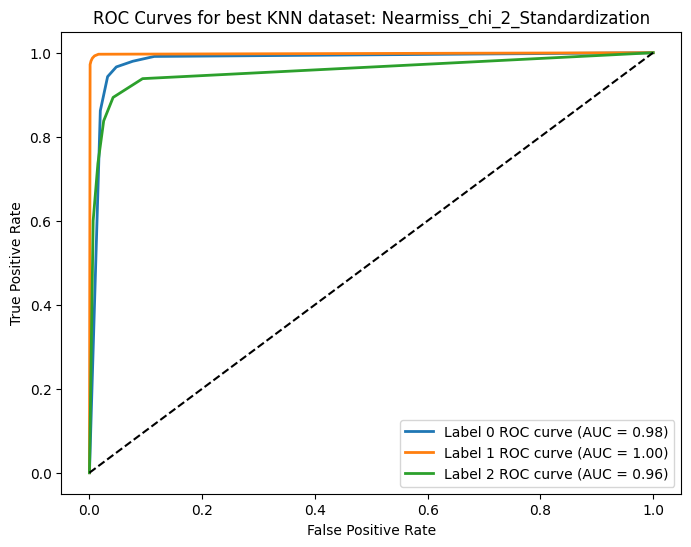

In [ ]:
from sklearn.metrics import auc

plt.figure(figsize=(8,6))
for i, label in enumerate(np.unique(y_train)):
    fpr, tpr, _ = roc_curve(best_y_test_bin_KNN[:, i], best_y_score_KNN[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Label {label} ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curves for best KNN dataset: {best_key_KNN}')
plt.legend(loc='lower right')
plt.show()


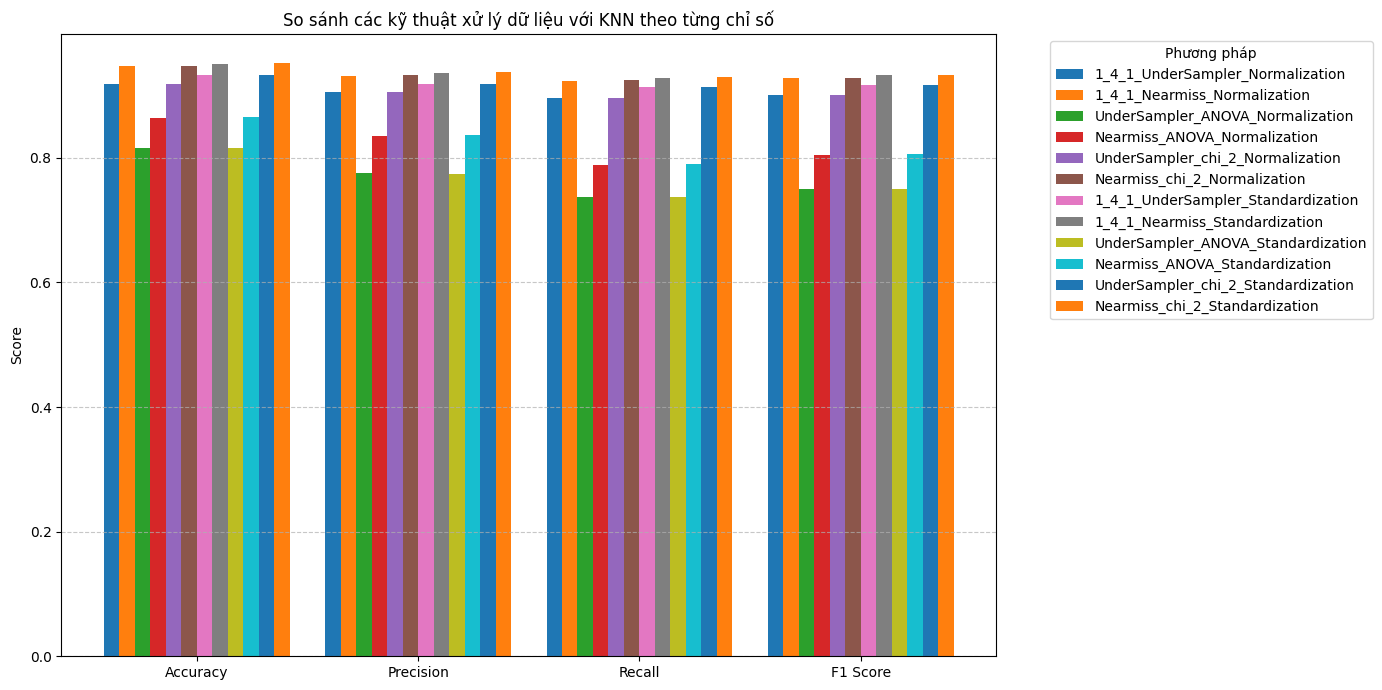

In [ ]:
# Danh sách các tên phương pháp (từ accuracy_dict)
methods = list(accuracy_dict_KNN.keys())

metrics = [accuracy_dict_KNN, precision_dict_KNN, recall_dict_KNN, f1_dict_KNN]
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

num_methods = len(methods)
num_metrics = len(metric_names)

x = np.arange(num_metrics)  # Vị trí trục x: [0, 1, 2, 3]
width = 0.07  # Độ rộng mỗi cột

plt.figure(figsize=(14, 7))

for i in range(num_methods):
    values = [metrics[j][methods[i]] for j in range(num_metrics)]
    plt.bar(x + (i - num_methods/2)*width + width/2, values, width=width, label=methods[i])

plt.xticks(x, metric_names)
plt.ylabel("Score")
plt.title("So sánh các kỹ thuật xử lý dữ liệu với KNN theo từng chỉ số")
plt.legend(title="Phương pháp", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **2.2.Decision Tree**

In [ ]:
datasets = [
    ("Nearmiss_1_4_1" ,x_train_nearmiss_1_4_1 , x_test_nearmiss_1_4_1, y_train_nearmiss_1_4_1, y_test_nearmiss_1_4_1 ),
    ("NearMiss_ANOVA", x_train_nearmiss_ANOVA, x_test_nearmiss_ANOVA, y_train_nearmiss_ANOVA, y_test_nearmiss_ANOVA),
    ("NearMiss_chi_2", x_train_nearmiss_chi_2, x_test_nearmiss_chi_2, y_train_nearmiss_chi_2, y_test_nearmiss_chi_2),
    ("UnderSampler_ANOVA", x_train_UnderSampler_ANOVA, x_test_UnderSampler_ANOVA, y_train_UnderSampler_ANOVA, y_test_UnderSampler_ANOVA),
    ( "UnderSampler_1_4_1" ,x_train_UnderSampler_1_4_1 , x_test_UnderSampler_1_4_1,y_train_UnderSampler_1_4_1, y_test_UnderSampler_1_4_1 ),
    ("UnderSampler_chi_2", x_train_UnderSampler_chi_2, x_test_UnderSampler_chi_2, y_train_UnderSampler_chi_2, y_test_UnderSampler_chi_2),
]
accuracy_dict_DT = {}
precision_dict_DT = {}
recall_dict_DT = {}
f1_dict_DT = {}
auc_label_0_DT = {}
auc_label_1_DT = {}
auc_label_2_DT = {}
total_DT = {}

for name, x_train, x_test, y_train, y_test in datasets:
    DT = DecisionTreeClassifier(
        min_samples_split=5,
        min_samples_leaf=2,
        max_depth=15,
        max_features='sqrt',
        random_state=42,
        criterion='gini',
        splitter='best',
    )

    DT.fit(x_train, y_train)
    y_pred_DT = DT.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred_DT)
    precision = precision_score(y_test, y_pred_DT, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred_DT, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred_DT, average='macro', zero_division=0)

    accuracy_dict_DT[name] = accuracy
    precision_dict_DT[name] = precision
    recall_dict_DT[name] = recall
    f1_dict_DT[name] = f1

     # Dự đoán xác suất
    y_score = DT.predict_proba(x_test)

        # Binarize nhãn thật
    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)

    for i, label in enumerate(classes):
        auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
        auc = auc.item()
        if label == 0:
            auc_label_0_DT[name] = auc
        elif label == 1:
            auc_label_1_DT[name] = auc
        elif label == 2:
            auc_label_2_DT[name] = auc


    total_DT[name] = accuracy + precision + recall + f1 + auc_label_0_DT.get(name, 0) + auc_label_1_DT.get(name, 0) + auc_label_2_DT.get(name, 0)
best_value_DT = 0
best_key_DT = ""

for key, value in total_DT.items():
    if value > best_value_DT:
        best_value_DT = value
        best_key_DT = key
        best_y_score_DT = y_score
        best_y_test_bin_DT = y_test_bin
best_key_DT , best_value_DT

('Nearmiss_1_4_1', 6.703148399652745)

In [ ]:
accuracy_dict_DT

{'Nearmiss_1_4_1': 0.9501311513099455,
 'NearMiss_ANOVA': 0.8828207459426697,
 'NearMiss_chi_2': 0.9470378614498751,
 'UnderSampler_ANOVA': 0.8307155322862129,
 'UnderSampler_1_4_1': 0.9096362249323343,
 'UnderSampler_chi_2': 0.909594423718009}

In [ ]:
precision_dict_DT

{'Nearmiss_1_4_1': 0.9354127137089615,
 'NearMiss_ANOVA': 0.8960363380324097,
 'NearMiss_chi_2': 0.9344001586197671,
 'UnderSampler_ANOVA': 0.851851692325022,
 'UnderSampler_1_4_1': 0.8989357955607993,
 'UnderSampler_chi_2': 0.9075922970439801}

In [ ]:
recall_dict_DT

{'Nearmiss_1_4_1': 0.9289265653565395,
 'NearMiss_ANOVA': 0.7913604967441894,
 'NearMiss_chi_2': 0.9293068618112846,
 'UnderSampler_ANOVA': 0.712924121084439,
 'UnderSampler_1_4_1': 0.8732013110887191,
 'UnderSampler_chi_2': 0.8573006247837002}

In [ ]:
f1_dict_DT

{'Nearmiss_1_4_1': 0.9320727520191129,
 'NearMiss_ANOVA': 0.816162855671811,
 'NearMiss_chi_2': 0.9317969945566899,
 'UnderSampler_ANOVA': 0.7290195155196098,
 'UnderSampler_1_4_1': 0.884502654716847,
 'UnderSampler_chi_2': 0.8769458374796909}

In [ ]:
auc_label_0_DT

{'Nearmiss_1_4_1': 0.9879450823456275,
 'NearMiss_ANOVA': 0.9386931516144192,
 'NearMiss_chi_2': 0.9904826290816642,
 'UnderSampler_ANOVA': 0.9074763629483168,
 'UnderSampler_1_4_1': 0.9758609289562357,
 'UnderSampler_chi_2': 0.9778085162909144}

In [ ]:
auc_label_1_DT

{'Nearmiss_1_4_1': 0.9972782753616348,
 'NearMiss_ANOVA': 0.9836749245386653,
 'NearMiss_chi_2': 0.9981505973804256,
 'UnderSampler_ANOVA': 0.9821205215230955,
 'UnderSampler_1_4_1': 0.9952830488848038,
 'UnderSampler_chi_2': 0.9959022552288685}

In [ ]:
auc_label_2_DT

{'Nearmiss_1_4_1': 0.9713818595509243,
 'NearMiss_ANOVA': 0.8830754680922624,
 'NearMiss_chi_2': 0.9764841265607118,
 'UnderSampler_ANOVA': 0.8707902689211855,
 'UnderSampler_1_4_1': 0.9658801512131564,
 'UnderSampler_chi_2': 0.9679343395320893}

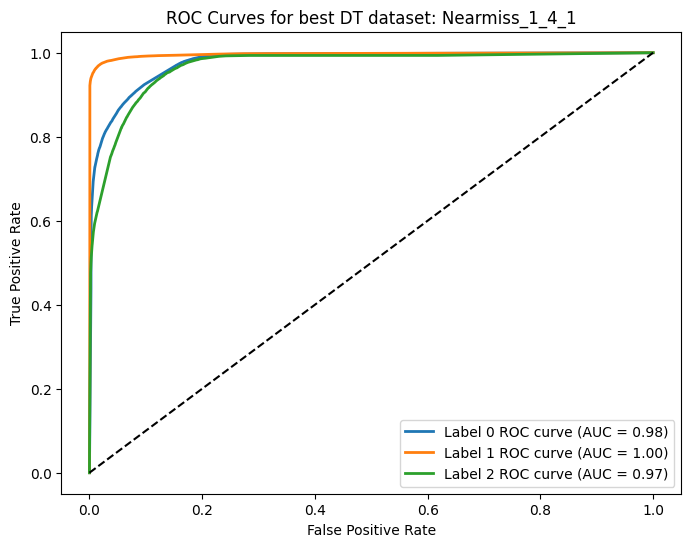

In [ ]:
from sklearn.metrics import auc

plt.figure(figsize=(8,6))
for i, label in enumerate(np.unique(y_train)):
    fpr, tpr, _ = roc_curve(best_y_test_bin_DT[:, i], best_y_score_DT[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Label {label} ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curves for best DT dataset: {best_key_DT}')
plt.legend(loc='lower right')
plt.show()


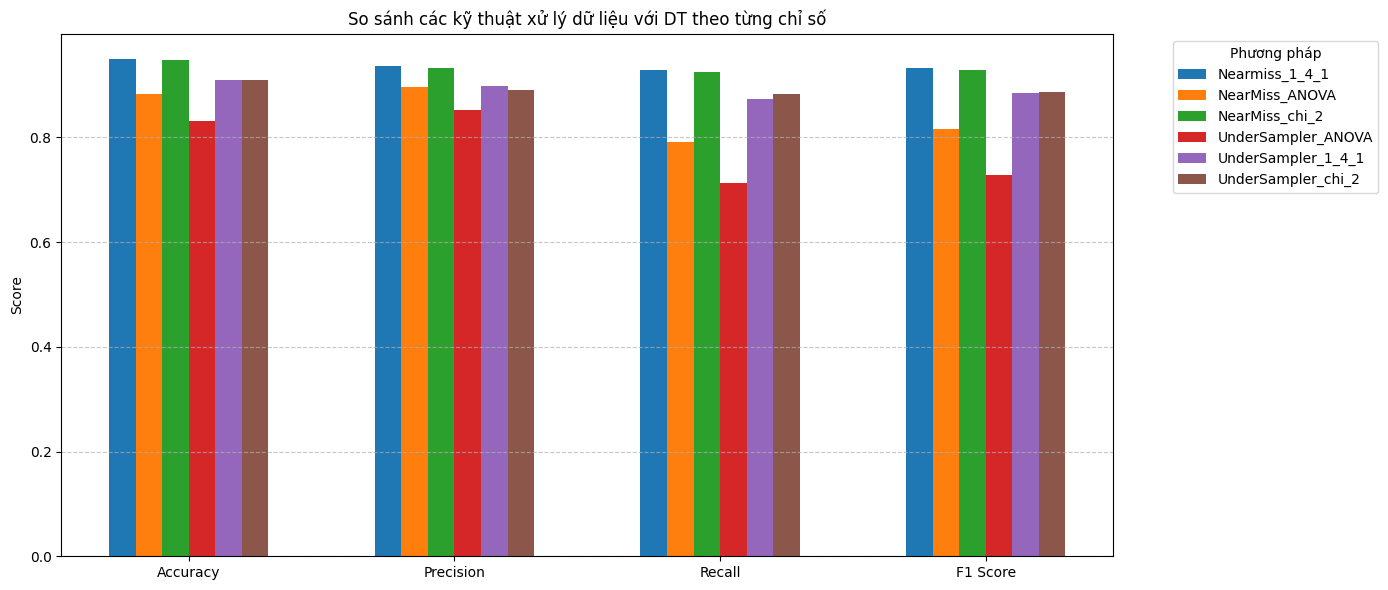

In [ ]:
# Danh sách các tên phương pháp (từ accuracy_dict)
methods = list(accuracy_dict_DT.keys())

metrics = [accuracy_dict_DT, precision_dict_DT, recall_dict_DT, f1_dict_DT]
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

num_methods = len(methods)
num_metrics = len(metric_names)

x = np.arange(num_metrics)  # Vị trí trục x: [0, 1, 2, 3]
width = 0.1  # Độ rộng mỗi cột

plt.figure(figsize=(14, 6))

for i in range(num_methods):
    values = [metrics[j][methods[i]] for j in range(num_metrics)]
    plt.bar(x + (i - num_methods/2)*width + width/2, values, width=width, label=methods[i])

plt.xticks(x, metric_names)
plt.ylabel("Score")
plt.title("So sánh các kỹ thuật xử lý dữ liệu với DT theo từng chỉ số")
plt.legend(title="Phương pháp", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **2.3.Random forest**

In [ ]:
datasets = [
    ("Nearmiss_1_4_1" ,x_train_nearmiss_1_4_1 , x_test_nearmiss_1_4_1, y_train_nearmiss_1_4_1, y_test_nearmiss_1_4_1 ),
    ("NearMiss_ANOVA", x_train_nearmiss_ANOVA, x_test_nearmiss_ANOVA, y_train_nearmiss_ANOVA, y_test_nearmiss_ANOVA),
    ("NearMiss_chi_2", x_train_nearmiss_chi_2, x_test_nearmiss_chi_2, y_train_nearmiss_chi_2, y_test_nearmiss_chi_2),
    ("UnderSampler_ANOVA", x_train_UnderSampler_ANOVA, x_test_UnderSampler_ANOVA, y_train_UnderSampler_ANOVA, y_test_UnderSampler_ANOVA),
    ( "UnderSampler_1_4_1" ,x_train_UnderSampler_1_4_1 , x_test_UnderSampler_1_4_1,y_train_UnderSampler_1_4_1, y_test_UnderSampler_1_4_1 ),
    ("UnderSampler_chi_2", x_train_UnderSampler_chi_2, x_test_UnderSampler_chi_2, y_train_UnderSampler_chi_2, y_test_UnderSampler_chi_2),
]
accuracy_dict_RF = {}
precision_dict_RF = {}
recall_dict_RF = {}
f1_dict_RF = {}
auc_label_0_RF = {}
auc_label_1_RF = {}
auc_label_2_RF = {}
total_RF = {}

for name, x_train, x_test, y_train, y_test in datasets:
    RF = RandomForestClassifier(
        n_estimators=285,
        criterion='gini',
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=3,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1,
)

    RF.fit(x_train, y_train)
    y_pred_RF = RF.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred_RF)
    precision = precision_score(y_test, y_pred_RF, average='macro')
    recall = recall_score(y_test, y_pred_RF, average='macro')
    f1 = f1_score(y_test, y_pred_RF, average='macro')

    accuracy_dict_RF[name] = accuracy
    precision_dict_RF[name] = precision
    recall_dict_RF[name] = recall
    f1_dict_RF[name] = f1

         # Dự đoán xác suất
    y_score = RF.predict_proba(x_test)

        # Binarize nhãn thật
    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)

    for i, label in enumerate(classes):
        auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
        auc = auc.item()
        if label == 0:
            auc_label_0_RF[name] = auc
        elif label == 1:
            auc_label_1_RF[name] = auc
        elif label == 2:
            auc_label_2_RF[name] = auc


    total_RF[name] = accuracy + precision + recall + f1 + auc_label_0_RF.get(name, 0) + auc_label_1_RF.get(name, 0) + auc_label_2_RF.get(name, 0)

# Sau khi hoàn thành vòng lặp, mới đi tìm best_key_RF
best_value_RF = 0
best_key_RF = ""

for key, value in total_RF.items():
    if value > best_value_RF:
        best_value_RF = value
        best_key_RF = key
        best_y_score_RF = y_score
        best_y_test_bin_RF = y_test_bin
best_key_RF ,best_value_RF


('NearMiss_chi_2', 6.743179294814304)

In [ ]:
accuracy_dict_RF

{'Nearmiss_1_4_1': 0.9527437272052753,
 'NearMiss_ANOVA': 0.8839284781222895,
 'NearMiss_chi_2': 0.9536633539204313,
 'UnderSampler_ANOVA': 0.8317083111264382,
 'UnderSampler_1_4_1': 0.922761806230471,
 'UnderSampler_chi_2': 0.9272031852525315}

In [ ]:
precision_dict_RF

{'Nearmiss_1_4_1': 0.9402495327177189,
 'NearMiss_ANOVA': 0.8979628215341376,
 'NearMiss_chi_2': 0.9410757430370698,
 'UnderSampler_ANOVA': 0.8643819988578859,
 'UnderSampler_1_4_1': 0.9376337001370353,
 'UnderSampler_chi_2': 0.9361755637317636}

In [ ]:
recall_dict_RF

{'Nearmiss_1_4_1': 0.9320951224579397,
 'NearMiss_ANOVA': 0.7933613472239093,
 'NearMiss_chi_2': 0.9335430013388982,
 'UnderSampler_ANOVA': 0.7113816600952783,
 'UnderSampler_1_4_1': 0.8744941737342945,
 'UnderSampler_chi_2': 0.8847943812984482}

In [ ]:
f1_dict_RF

{'Nearmiss_1_4_1': 0.9360292333154024,
 'NearMiss_ANOVA': 0.8185595628161003,
 'NearMiss_chi_2': 0.9371868183579454,
 'UnderSampler_ANOVA': 0.7266737348433043,
 'UnderSampler_1_4_1': 0.8983015255253163,
 'UnderSampler_chi_2': 0.9052310567747943}

In [ ]:
auc_label_0_RF

{'Nearmiss_1_4_1': 0.9932225482791084,
 'NearMiss_ANOVA': 0.9388119627007316,
 'NearMiss_chi_2': 0.9933337644652849,
 'UnderSampler_ANOVA': 0.9066749732082756,
 'UnderSampler_1_4_1': 0.986150102004978,
 'UnderSampler_chi_2': 0.9871972072522129}

In [ ]:
auc_label_1_RF

{'Nearmiss_1_4_1': 0.999728169341496,
 'NearMiss_ANOVA': 0.9881568145589668,
 'NearMiss_chi_2': 0.9997573103137174,
 'UnderSampler_ANOVA': 0.979380133992628,
 'UnderSampler_1_4_1': 0.9982613087325005,
 'UnderSampler_chi_2': 0.9985067965564787}

In [ ]:
auc_label_2_RF

{'Nearmiss_1_4_1': 0.9841969311062604,
 'NearMiss_ANOVA': 0.888683514747641,
 'NearMiss_chi_2': 0.9846193033809575,
 'UnderSampler_ANOVA': 0.8736465859646522,
 'UnderSampler_1_4_1': 0.9815397747165168,
 'UnderSampler_chi_2': 0.9827859886547737}

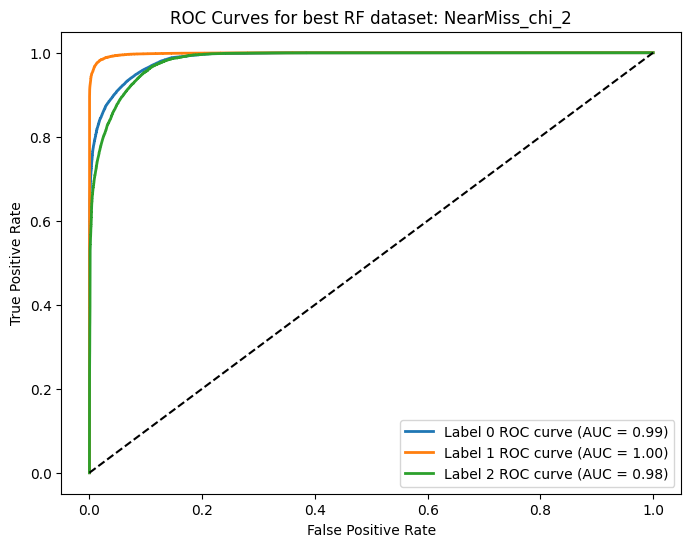

In [ ]:
from sklearn.metrics import auc
plt.figure(figsize=(8,6))
for i, label in enumerate(np.unique(y_train)):
    fpr, tpr, _ = roc_curve(best_y_test_bin_RF[:, i], best_y_score_RF[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Label {label} ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curves for best RF dataset: {best_key_RF}')
plt.legend(loc='lower right')
plt.show()

##**2.4.Naive Bayes**

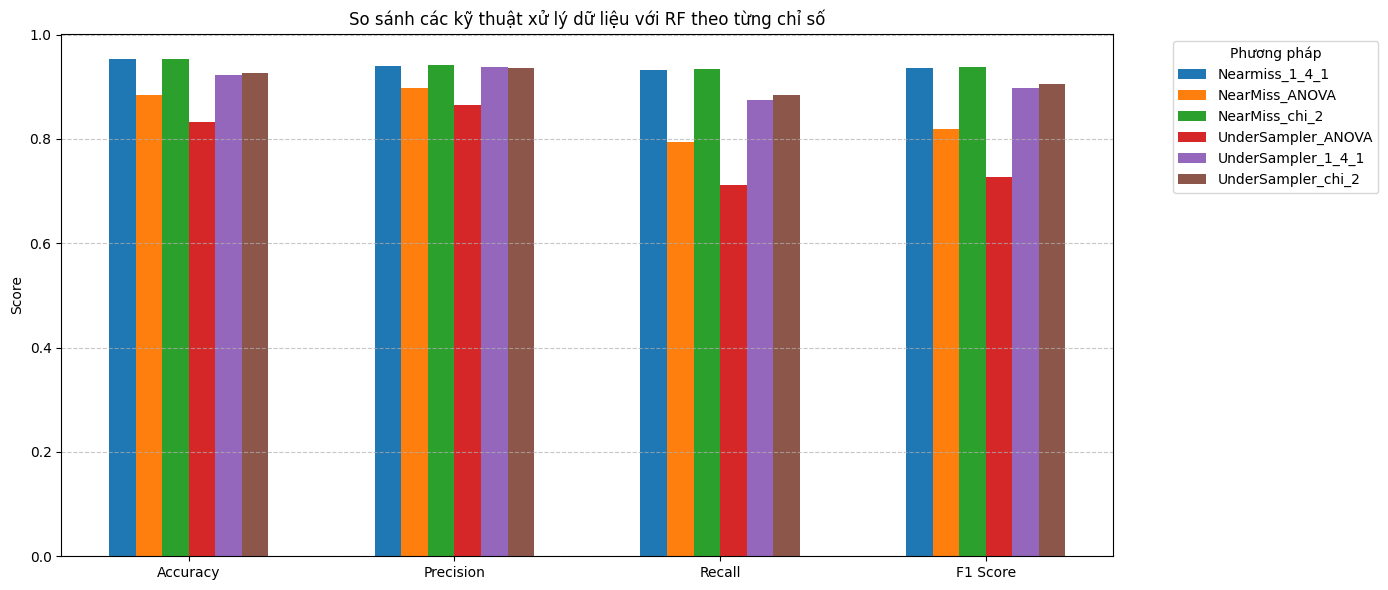

In [ ]:
# Danh sách các tên phương pháp (từ accuracy_dict)
methods = list(accuracy_dict_RF.keys())

metrics = [accuracy_dict_RF, precision_dict_RF, recall_dict_RF, f1_dict_RF]
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

num_methods = len(methods)
num_metrics = len(metric_names)

x = np.arange(num_metrics)  # Vị trí trục x: [0, 1, 2, 3]
width = 0.1  # Độ rộng mỗi cột

plt.figure(figsize=(14, 6))

for i in range(num_methods):
    values = [metrics[j][methods[i]] for j in range(num_metrics)]
    plt.bar(x + (i - num_methods/2)*width + width/2, values, width=width, label=methods[i])

plt.xticks(x, metric_names)
plt.ylabel("Score")
plt.title("So sánh các kỹ thuật xử lý dữ liệu với RF theo từng chỉ số")
plt.legend(title="Phương pháp", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
datasets = [
    ("Nearmiss_1_4_1" ,x_train_nearmiss_1_4_1 , x_test_nearmiss_1_4_1, y_train_nearmiss_1_4_1, y_test_nearmiss_1_4_1 ),
    ("NearMiss_ANOVA", x_train_nearmiss_ANOVA, x_test_nearmiss_ANOVA, y_train_nearmiss_ANOVA, y_test_nearmiss_ANOVA),
    ("NearMiss_chi_2", x_train_nearmiss_chi_2, x_test_nearmiss_chi_2, y_train_nearmiss_chi_2, y_test_nearmiss_chi_2),
    ("UnderSampler_ANOVA", x_train_UnderSampler_ANOVA, x_test_UnderSampler_ANOVA, y_train_UnderSampler_ANOVA, y_test_UnderSampler_ANOVA),
    ( "UnderSampler_1_4_1" ,x_train_UnderSampler_1_4_1 , x_test_UnderSampler_1_4_1,y_train_UnderSampler_1_4_1, y_test_UnderSampler_1_4_1 ),
    ("UnderSampler_chi_2", x_train_UnderSampler_chi_2, x_test_UnderSampler_chi_2, y_train_UnderSampler_chi_2, y_test_UnderSampler_chi_2),
]
accuracy_dict_NB = {}
precision_dict_NB = {}
recall_dict_NB = {}
f1_dict_NB = {}
auc_label_0_NB = {}
auc_label_1_NB = {}
auc_label_2_NB = {}
total_NB = {}

for name, x_train, x_test, y_train, y_test in datasets:
    NB = GaussianNB(priors=None, var_smoothing=1e-09)


    NB.fit(x_train, y_train)
    y_pred_NB = NB.predict(x_test)

    accuracy = round(accuracy_score(y_test, y_pred_NB), 4)
    precision = round(precision_score(y_test, y_pred_NB, average='macro', zero_division=0), 4)
    recall = round(recall_score(y_test, y_pred_NB, average='macro', zero_division=0), 4)
    f1 = round(f1_score(y_test, y_pred_NB, average='macro', zero_division=0), 4)

    accuracy_dict_NB[name] = accuracy
    precision_dict_NB[name] = precision
    recall_dict_NB[name] = recall
    f1_dict_NB[name] = f1

    y_score = NB.predict_proba(x_test)

        # Binarize nhãn thật
    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)

    for i, label in enumerate(classes):
        auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
        auc = auc.item()
        if label == 0:
            auc_label_0_NB[name] = auc
        elif label == 1:
            auc_label_1_NB[name] = auc
        elif label == 2:
            auc_label_2_NB[name] = auc


    total_NB[name] = accuracy + precision + recall + f1 + auc_label_0_NB.get(name, 0) + auc_label_1_NB.get(name, 0) + auc_label_2_NB.get(name, 0)

# Sau khi hoàn thành vòng lặp, mới đi tìm best_key_NB
best_value_NB = 0
best_key_NB = ""

for key, value in total_NB.items():
    if value > best_value_NB:
        best_value_NB = value
        best_key_NB = key
        best_y_score_NB = y_score
        best_y_test_bin_NB = y_test_bin
best_key_NB ,best_value_NB


('NearMiss_ANOVA', 5.345554517658421)

In [ ]:
accuracy_dict_NB

{'Nearmiss_1_4_1': 0.7514,
 'NearMiss_ANOVA': 0.8087,
 'NearMiss_chi_2': 0.7513,
 'UnderSampler_ANOVA': 0.4765,
 'UnderSampler_1_4_1': 0.3691,
 'UnderSampler_chi_2': 0.369}

In [ ]:
precision_dict_NB

{'Nearmiss_1_4_1': 0.7815,
 'NearMiss_ANOVA': 0.7179,
 'NearMiss_chi_2': 0.7658,
 'UnderSampler_ANOVA': 0.607,
 'UnderSampler_1_4_1': 0.3533,
 'UnderSampler_chi_2': 0.3531}

In [ ]:
recall_dict_NB

{'Nearmiss_1_4_1': 0.5868,
 'NearMiss_ANOVA': 0.6564,
 'NearMiss_chi_2': 0.5869,
 'UnderSampler_ANOVA': 0.5586,
 'UnderSampler_1_4_1': 0.3521,
 'UnderSampler_chi_2': 0.352}

In [ ]:
f1_dict_NB

{'Nearmiss_1_4_1': 0.5509,
 'NearMiss_ANOVA': 0.6159,
 'NearMiss_chi_2': 0.5511,
 'UnderSampler_ANOVA': 0.4359,
 'UnderSampler_1_4_1': 0.2332,
 'UnderSampler_chi_2': 0.2332}

In [ ]:
auc_label_0_NB

{'Nearmiss_1_4_1': 0.9082958800191698,
 'NearMiss_ANOVA': 0.869145225879018,
 'NearMiss_chi_2': 0.9081513403677299,
 'UnderSampler_ANOVA': 0.8359657266960641,
 'UnderSampler_1_4_1': 0.8129883785403245,
 'UnderSampler_chi_2': 0.7421019326897804}

In [ ]:
auc_label_1_NB

{'Nearmiss_1_4_1': 0.9557355677913663,
 'NearMiss_ANOVA': 0.9679192797266704,
 'NearMiss_chi_2': 0.9407098643759891,
 'UnderSampler_ANOVA': 0.9455384570870257,
 'UnderSampler_1_4_1': 0.8833413067337601,
 'UnderSampler_chi_2': 0.8075788914851885}

In [ ]:
auc_label_2_NB

{'Nearmiss_1_4_1': 0.5649135805195098,
 'NearMiss_ANOVA': 0.7095900120527325,
 'NearMiss_chi_2': 0.5423365360871593,
 'UnderSampler_ANOVA': 0.6794819198821243,
 'UnderSampler_1_4_1': 0.6941760204907619,
 'UnderSampler_chi_2': 0.675999719046226}

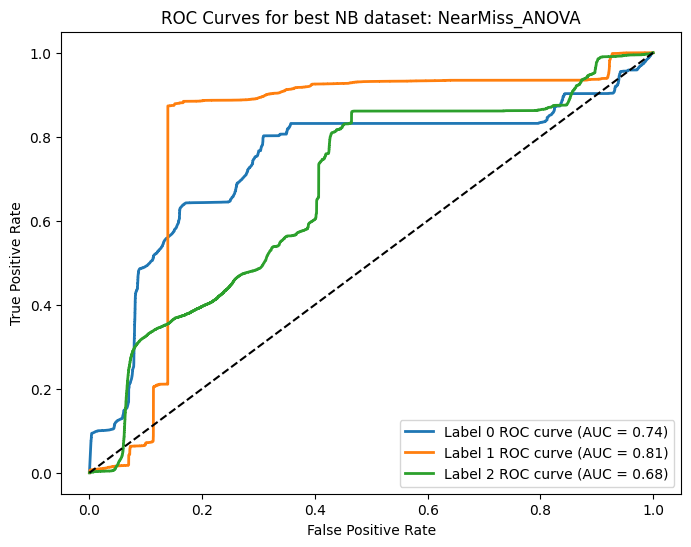

In [ ]:
from sklearn.metrics import auc

plt.figure(figsize=(8,6))
for i, label in enumerate(np.unique(y_train)):
    fpr, tpr, _ = roc_curve(best_y_test_bin_NB[:, i], best_y_score_NB[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Label {label} ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curves for best NB dataset: {best_key_NB}')
plt.legend(loc='lower right')
plt.show()

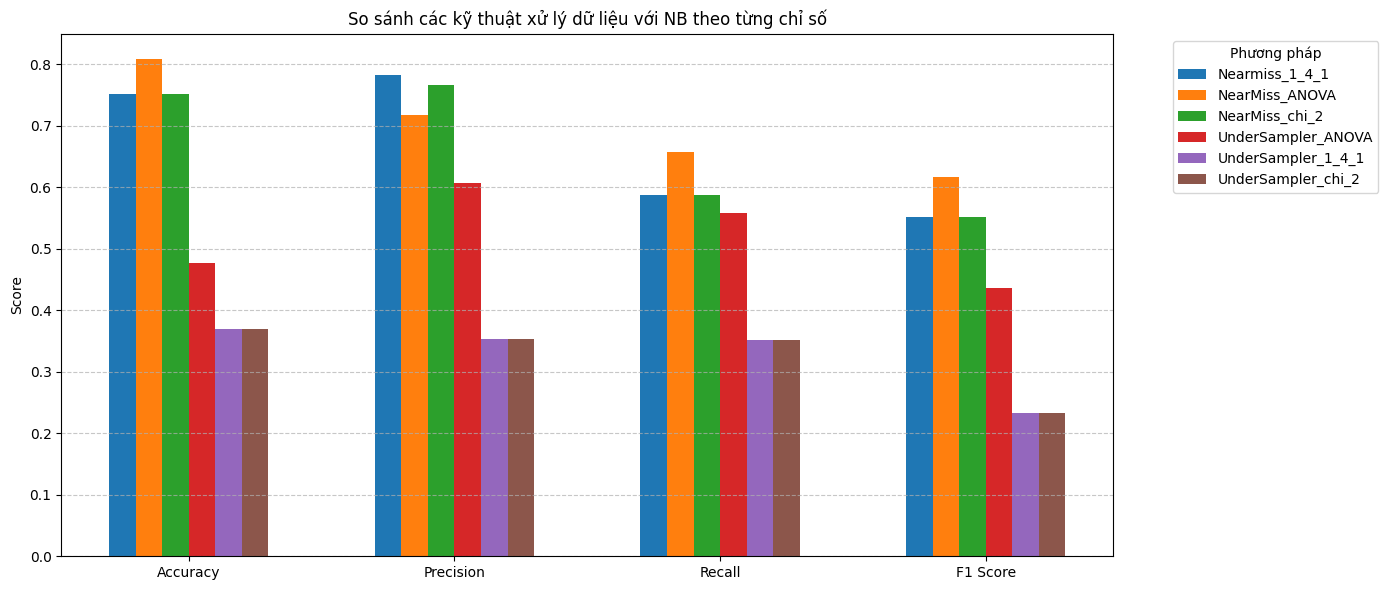

In [ ]:
# Danh sách các tên phương pháp (từ accuracy_dict)
methods = list(accuracy_dict_NB.keys())

metrics = [accuracy_dict_NB, precision_dict_NB, recall_dict_NB, f1_dict_NB]
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

num_methods = len(methods)
num_metrics = len(metric_names)

x = np.arange(num_metrics)  # Vị trí trục x: [0, 1, 2, 3]
width = 0.1  # Độ rộng mỗi cột

plt.figure(figsize=(14, 6))

for i in range(num_methods):
    values = [metrics[j][methods[i]] for j in range(num_metrics)]
    plt.bar(x + (i - num_methods/2)*width + width/2, values, width=width, label=methods[i])

plt.xticks(x, metric_names)
plt.ylabel("Score")
plt.title("So sánh các kỹ thuật xử lý dữ liệu với NB theo từng chỉ số")
plt.legend(title="Phương pháp", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **Ta có thể thấy best_value_RF có tổng các tham số là lớn nhất , và kịch bản có các tham số tốt nhất là kịch bản One-hot Encoding , Chi-square , NearMiss và Random Forest**

